<h1><center>MÔN HỌC: THỊ GIÁC MÁY TÍNH-7080518</center></h1>
<h2><center>BÀI TEST - Số 3</center></h2>

------------

**THÔNG TIN SINH VIÊN:**
1. Mã sinh viên : 2121050054
2. Họ tên sinh viên: Nguyễn Việt Anh 
3. Ngày sinh : 14/03/2003
4. Lớp : DCCTKH66
5. Nhóm môn học : 01

# Bài 1:

In [37]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

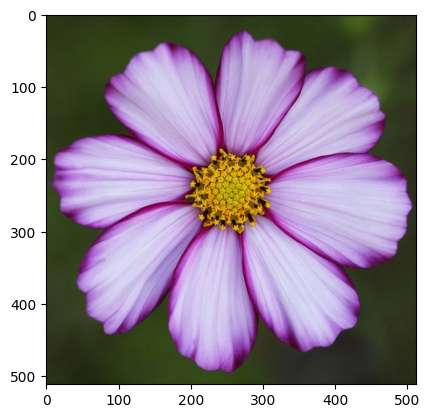

In [38]:
img = cv2.imread('Pic/Pic_T1.png',1)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [39]:
print(f'Kích thước ảnh {img.shape[0]} X {img.shape[1]}')
print(f'Số pixel điểm ảnh:{img.shape[0]*img.shape[1]} pixel')

Kích thước ảnh 512 X 512
Số pixel điểm ảnh:262144 pixel


Ảnh sau khi thay đổi kích thước: 
1.Kích thước ảnh 400 X 400 
2. Số pixel điểm ảnh : 160000 pixel


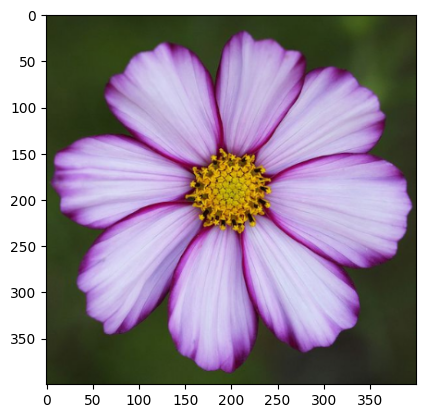

In [40]:
img = cv2.resize(img,(400,400))
plt.imshow(img)
print(f'Ảnh sau khi thay đổi kích thước: \n1.Kích thước ảnh {img.shape[0]} X {img.shape[1]} \n2. Số pixel điểm ảnh : {img.shape[0]*img.shape[1]} pixel')

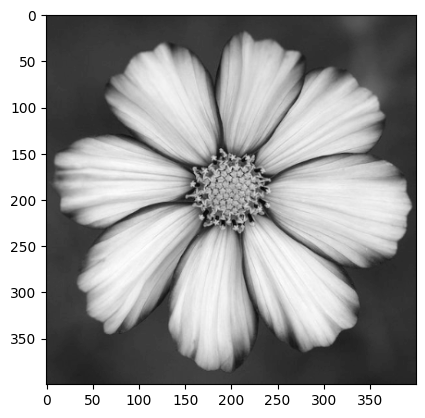

In [41]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')

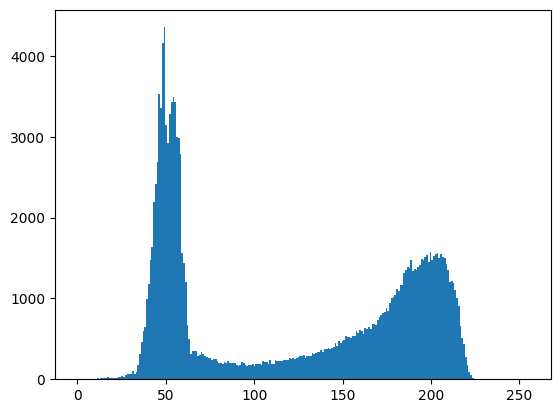

In [42]:
plt.hist(img_gray.ravel(),256,[0,255])
plt.show()

In [46]:
T,img_bw = cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY)

Text(0.5, 1.0, 'Đường biên của cánh hoa theo Lapacian')

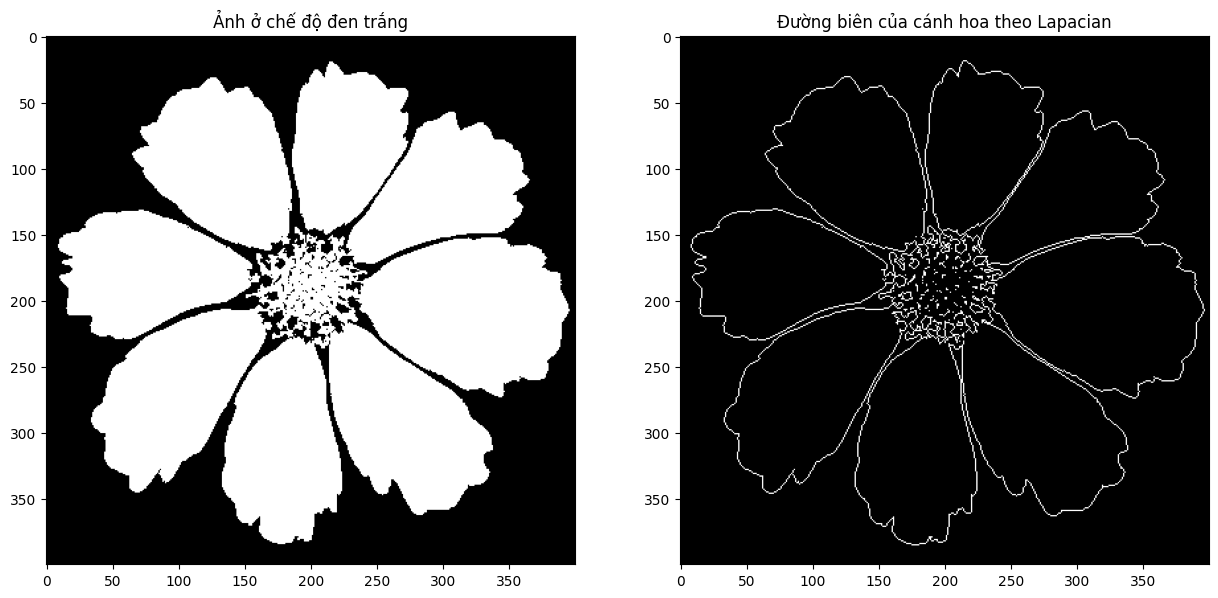

In [49]:

img_lap = cv2.Laplacian(img_bw,-1,5)

#Hiển thị kết quả:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img_bw,cmap='gray')
plt.title('Ảnh ở chế độ đen trắng')
plt.subplot(1,2,2)
plt.imshow(img_lap,cmap='gray')
plt.title('Đường biên của cánh hoa theo Lapacian')

# Bài 2

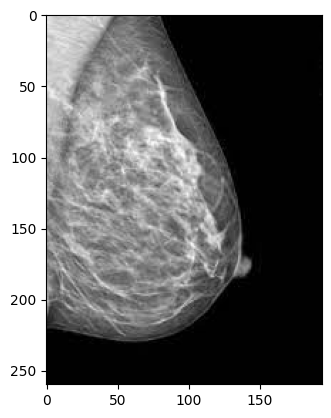

In [51]:
img = cv2.imread('Pic/Pic_T2.jpeg',0)
plt.imshow(img,cmap='gray')

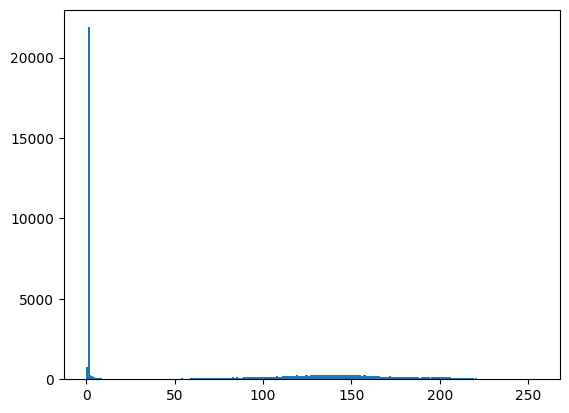

In [52]:
plt.hist(img.ravel(),256,[0,255])
plt.show()

Text(0.5, 1.0, 'Ảnh phát hiện biên với Canny')

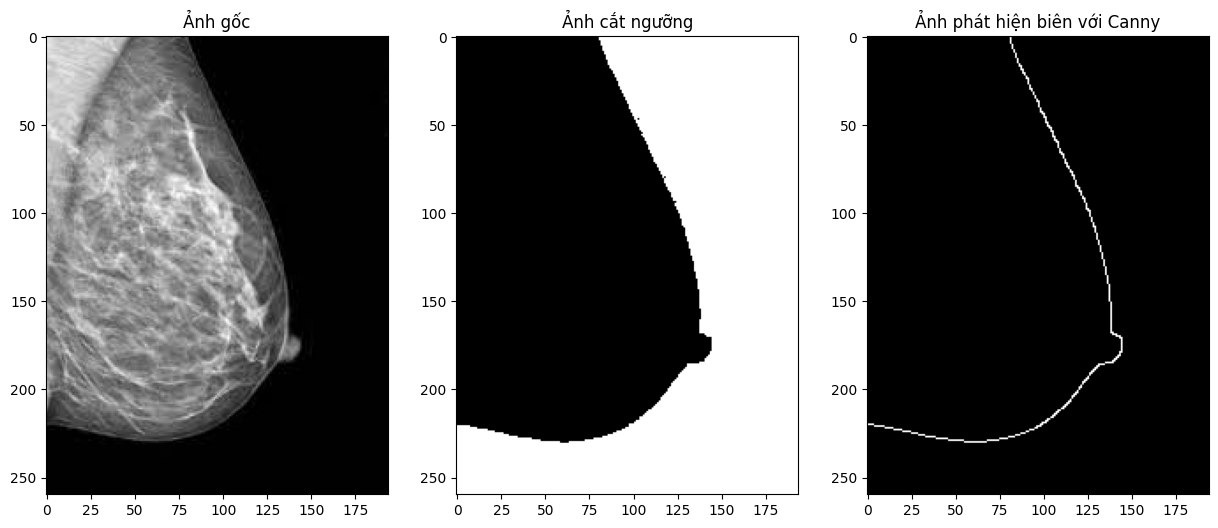

In [109]:
T,pic = cv2.threshold(img,20,255,cv2.THRESH_BINARY_INV)
img_blur = cv2.GaussianBlur(pic,(7,7),0)

sigma = 1.1
median = np.median(img_blur)
lower = int(max(0,(1.0-sigma)*median))
upper = int(min(255,(1.0+sigma)*median))
auto_canny = cv2.Canny(img_blur,lower,upper,9)


plt.figure(figsize=(15,9))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(1,3,2)
plt.imshow(pic,cmap='gray')
plt.title('Ảnh cắt ngưỡng')
plt.subplot(1,3,3)
plt.imshow(auto_canny,cmap='gray')
plt.title('Ảnh phát hiện biên với Canny')

# Bài 3

Sinh viên sử dụng thị giác máy tính, thiết lập các tham số phù hợp để thực hiện
đếm số quả bóng trong hình Pic_T3.jpg

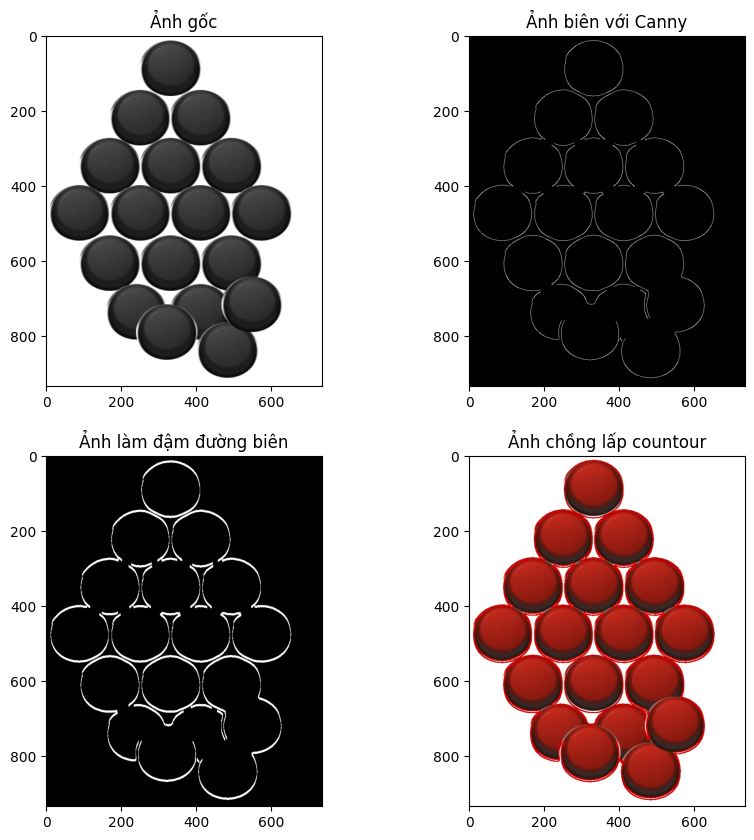

Số lượng đồng xu trong ảnh là:  18


In [133]:
image = cv2.imread('Pic/Pic_T3.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray');
plt.title('Ảnh gốc')


blur = cv2.GaussianBlur(gray, (17,23), 0)
canny = cv2.Canny(blur, 80, 150, 3)
plt.subplot(2,2,2)
plt.imshow(canny, cmap='gray')
plt.title('Ảnh biên với Canny')



dilated = cv2.dilate(canny, (5,5), iterations = 5)
plt.subplot(2,2,3)
plt.imshow(dilated, cmap='gray')
plt.title('Ảnh làm đậm đường biên')


(cnt, heirarchy) = cv2.findContours(dilated.copy(), 
                                    cv2.RETR_EXTERNAL, 
                                    cv2.CHAIN_APPROX_NONE)

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (200,0,0), 2)

plt.subplot(2,2,4)
plt.imshow(rgb)
plt.title('Ảnh chồng lấp countour')
plt.show()

print('Số lượng đồng xu trong ảnh là: ', len(cnt))

